# Simple Linear Regression:-

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In a cause and effect relationship, the independent variable is the cause, and the dependent variable is the effect. Least squares linear regression is a method for predicting the value of a dependent variable Y, based on the value of an independent variable X.

In [1]:
import pandas as pd # For dataset analysis

In [2]:
import seaborn as sns  # For the interactive visualizations

In [3]:
df=sns.load_dataset("tips")  # Loading the required dataset

In [4]:
df  # Displaying the datset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.groupby(["sex","smoker","day","time"])["total_bill"].mean()

sex     smoker  day   time  
Male    Yes     Thur  Lunch     19.171000
                      Dinner          NaN
                Fri   Lunch     11.386667
                      Dinner    25.892000
                Sat   Lunch           NaN
                      Dinner    21.837778
                Sun   Lunch           NaN
                      Dinner    26.141333
        No      Thur  Lunch     18.486500
                      Dinner          NaN
                Fri   Lunch           NaN
                      Dinner    17.475000
                Sat   Lunch           NaN
                      Dinner    19.929063
                Sun   Lunch           NaN
                      Dinner    20.403256
Female  Yes     Thur  Lunch     19.218571
                      Dinner          NaN
                Fri   Lunch     13.260000
                      Dinner    12.200000
                Sat   Lunch           NaN
                      Dinner    20.266667
                Sun   Lunch           NaN
     

In [12]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# EDA ( Exploratory Data Analysis )

In [5]:
df.info()   # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.shape

(244, 7)

In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Coding

In [6]:
x=df["total_bill"]  # independent variable which is input 
y=df["tip"]         # dependent variable which is output

In [7]:
import matplotlib.pyplot as plt # For visualization

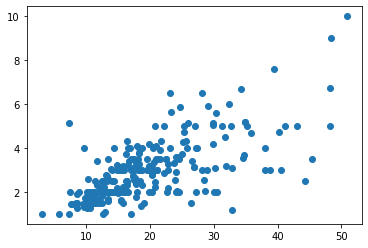

In [8]:
plt.scatter(x,y)  # Scatter plot to understand the relationship between x and y

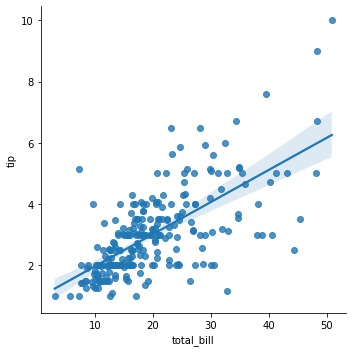

In [9]:
sns.lmplot(x="total_bill",y="tip",data=df)  

# Using Scipy

In [11]:
from scipy import stats # importing the required scipy moule

In [12]:
slope,intercept,r,p,std_err=stats.linregress(x,y) 

In [13]:
print(slope,intercept,r,p,std_err)

0.10502451738435342 0.9202696135546722 0.6757341092113647 6.6924706468631615e-34 0.007364789848762593


In [16]:
def linear_regree(x):
    return slope*x+intercept

In [20]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
linear_regree(29.03)

3.969131353222452

# Using sklearn

>We can also use the sklearn library to fit various machine learning models. To perform the same analysis, we need to import the linear_model module from this library.

In [27]:
from sklearn.linear_model import LinearRegression  # importing the required "LinearRegression()" from "sklearn"

In [28]:
model=LinearRegression() # We can then create our linear regression object. 

    Next, we need to specify the predictor, X, and the response, y. To do this, we pass in the clumns we want to use for the model

In [29]:
# note that it is a uppercase X and lowercase y
# this will fail because our X has only 1 variable.

model.fit(x,y) 

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
df.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [33]:
import numpy as np

In [ ]:
x=x.values.reshape(-1,1)

In [ ]:
model.fix(x.values.reshape(-1,1),y)

    Since sklearn is built to take numpy arrays there will be times when you have to do some data manipulations to pass your dataframe into sklearn. The error message in the preceding output esentially tells us the matrix passed is not in the correct shape. We need to reshape our inputs. Depending on whether we have a single feature (which is the case here) or a single sample(i.e., multple observations), we will specify reshape(-1, 1) or reshape(1, -1) respectively. 

    Calling reshape directly on the column will raise either a DeprecationWarning or ValueError depending on the version of Pandas being used. To properly reshape our data, we must use the values attribute (otherwise you may get another error or warning). When we call values on Pandas dataframe or series, we get the numpy ndarray representation of the data. 

In [27]:
model.coef_

array([0.10502452])

In [28]:
# To get the intercept, we call the intercept_attribute.
model.intercept_

0.9202696135546735

# Multiple Linear Regression
    In simple iinear regression, one predictor is regressed ona continuous response variable. Alternatively, we can use multiple regression to put multiple predictors in a model.
    
    The syntax for multiple regression in sklearn is very similar to the syntax for simple linear regression with this library. To add more features into model, we pass in the columns we want to use.

In [ ]:
y=m1x+m2x+b

In [29]:
mlr=LinearRegression()

In [32]:
# since we are performing multiple regression, we no longer need to reshape our X values

model= mlr.fit(X = df[['total_bill', 'size']], y = df['tip'])

In [33]:
model.coef_


array([0.09271334, 0.19259779])

In [34]:
model.intercept_

0.6689447408125031

# Using sklearn with Categorical Variables
    Here, we have to manually create our dummy variables for sklearn. Luckily,Pandas has a function, get_dummies, that will do this work for us. This function converts all the categorical variables into dummy variables automatically, so we do not need to pass in individual columns one at a time. sklearn has OneHotEncoder function that does something similar.

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
df_dummy = pd.get_dummies(df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']])

In [37]:
df_dummy

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2,1,0,1,0,0,0,1,0,0,1
242,17.82,2,1,0,0,1,0,0,1,0,0,1


In [38]:
df_dummy_ref = pd.get_dummies(df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first = True)

    To drop the reference variable, we can pass in drop_first = True

In [39]:
df_dummy_ref

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [40]:
model=LinearRegression()

In [41]:
model.fit(X = df_dummy_ref, y = df['tip'])

LinearRegression()

In [42]:
model.coef_

array([ 0.09448701,  0.175992  ,  0.03244094,  0.08640832,  0.1622592 ,
        0.04080082,  0.13677854, -0.0681286 ])

In [ ]:
model.intercept_